In [4]:
!pip install pycaret

In [5]:
!pip install m2cgen

In [6]:
import pandas as pd
from pycaret.regression import *
dataset = pd.read_csv('credit.csv')
dataset.head()

data = dataset.sample(frac=0.8, random_state=786)
data_unseen = dataset.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (64000, 305)
Unseen Data For Predictions: (16000, 305)


In [7]:
from pycaret.regression import *
exp_reg102 = setup(data = data, target = 'y', session_id=123)

,Description,Value
0,Session id,123
1,Target,y
2,Target type,Regression
3,Original data shape,"(64000, 305)"
4,Transformed data shape,"(64000, 305)"
5,Transformed train set shape,"(44800, 305)"
6,Transformed test set shape,"(19200, 305)"
7,Numeric features,304
8,Rows with missing values,100.0%
9,Preprocess,True


In [8]:
light_gbm = create_model('lightgbm',round = 6, fold = 10)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.036117,0.002645,0.051430,0.945889,0.033882,0.077118
1,0.037582,0.002684,0.051807,0.942612,0.034145,0.083116
2,0.036500,0.002561,0.050606,0.946341,0.033260,0.077575
3,0.037202,0.002670,0.051669,0.944548,0.034100,0.102594
4,0.037356,0.002665,0.051624,0.943402,0.034045,0.078929
5,0.037550,0.002687,0.051840,0.942971,0.034227,0.094451
6,0.037341,0.002712,0.052076,0.943049,0.034663,0.085488
7,0.037882,0.002717,0.052126,0.942152,0.034254,0.079846
8,0.036280,0.002541,0.050411,0.948268,0.033354,0.082130


In [9]:
tuned_light_gbm = tune_model(light_gbm,  round = 6, fold=10)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.042504,0.003445,0.058698,0.929514,0.038699,0.092895
1,0.042680,0.003391,0.058229,0.927500,0.038601,0.096410
2,0.042202,0.003333,0.057733,0.930163,0.038178,0.094338
3,0.042844,0.003407,0.058369,0.929234,0.038778,0.126739
4,0.043208,0.003421,0.058491,0.927341,0.038508,0.093405
5,0.043194,0.003453,0.058758,0.926735,0.038829,0.116709
6,0.042733,0.003472,0.058922,0.927092,0.039395,0.101201
7,0.043208,0.003439,0.058639,0.926791,0.038550,0.093375
8,0.042788,0.003343,0.057821,0.931941,0.038388,0.105250


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


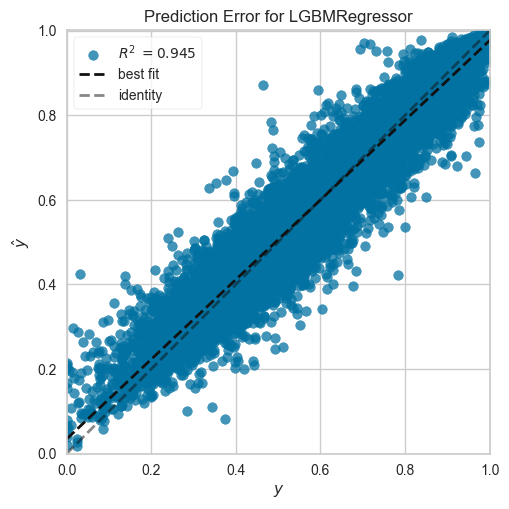

In [10]:
plot_model(tuned_light_gbm, plot = 'error')

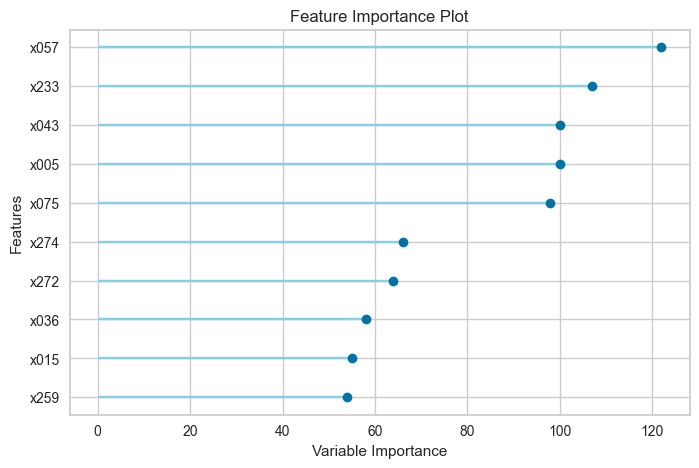

In [11]:
plot_model(tuned_light_gbm, plot='feature')

In [12]:
evaluate_model(tuned_light_gbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [13]:
interpret_model(tuned_light_gbm, plot='reason', observation=10)

In [14]:
bagged_light_gbm = ensemble_model(tuned_light_gbm, method = 'Bagging', n_estimators=100)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0357,0.0026,0.0510,0.9469,0.0336,0.0767
1,0.0368,0.0026,0.0511,0.9441,0.0337,0.0818
2,0.0360,0.0025,0.0501,0.9474,0.0330,0.0775
3,0.0365,0.0026,0.0509,0.9463,0.0337,0.1029
4,0.0369,0.0026,0.0510,0.9448,0.0337,0.0778
5,0.0372,0.0026,0.0513,0.9441,0.0339,0.0953
6,0.0369,0.0027,0.0516,0.9441,0.0344,0.0848
7,0.0374,0.0027,0.0516,0.9434,0.0339,0.0793
8,0.0362,0.0025,0.0503,0.9484,0.0333,0.0834


In [15]:
predict_model(bagged_light_gbm)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,0.0369,0.0027,0.0515,0.9462,0.0342,0.0885


,x001,x002,x003,x004,x005,x006,x007,x008,x009,x010,...,x297,x298,x299,x300,x301,x302,x303,x304,y,prediction_label
19593,1468445,127.0,2.0,51.0,173.0,1,2,4,0,1,...,0.7280,1,1,1,0,NaN,0,NaN,0.513915,0.593405
4997,878198,NaN,NaN,NaN,NaN,0,0,0,0,0,...,NaN,0,0,0,0,NaN,0,NaN,0.372913,0.386919
36682,205224,306.0,5.0,134.0,306.0,0,1,1,0,1,...,0.8889,1,1,1,0,NaN,0,NaN,0.968460,0.965844
29881,1665290,281.0,16.0,148.0,281.0,0,0,0,1,0,...,0.9047,1,1,1,0,NaN,0,NaN,0.896104,0.841988
25401,1320183,26.0,26.0,26.0,218.0,0,0,0,0,1,...,NaN,0,0,0,0,NaN,0,NaN,0.948052,0.959631
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39655,836538,8.0,4.0,5.0,49.0,1,2,4,7,3,...,0.8640,1,1,1,0,NaN,0,NaN,0.512059,0.418845
45479,1218680,3.0,3.0,3.0,3.0,0,1,1,0,0,...,NaN,0,0,0,0,NaN,0,NaN,0.133581,0.209006
21007,1313631,390.0,11.0,108.0,487.0,0,0,2,2,0,...,NaN,1,1,1,0,NaN,0,NaN,0.894249,0.857251
39923,1086613,63.0,5.0,29.0,63.0,0,1,2,1,2,...,0.9178,1,1,1,0,1.0,18642,1.0076,0.784787,0.752028


In [16]:
final_bagged_light_gbm = finalize_model(bagged_light_gbm)
print(final_bagged_light_gbm)

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['x001', 'x002', 'x003', 'x004',
                                             'x005', 'x006', 'x007', 'x008',
                                             'x009', 'x010', 'x011', 'x012',
                                             'x013', 'x014', 'x015', 'x016',
                                             'x017', 'x018', 'x019', 'x020',
                                             'x021', 'x022', 'x023', 'x024',
                                             'x025', 'x026', 'x027', 'x028',
                                             'x029', 'x030', ...],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('actual_estimator',
                 BaggingRegressor(

In [17]:
unseen_predictions_bagged_light_gbm = predict_model(final_bagged_light_gbm, data=data_unseen)
unseen_predictions_bagged_light_gbm.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,0.0360,0.0025,0.0499,0.9483,0.0329,0.0815


,x001,x002,x003,x004,x005,x006,x007,x008,x009,x010,...,x297,x298,x299,x300,x301,x302,x303,x304,y,prediction_label
0,959054,NaN,NaN,NaN,102.0,0,0,0,0,0,...,NaN,1,1,1,0,NaN,0,NaN,0.426716,0.450483
1,807817,112.0,112.0,112.0,187.0,1,0,0,0,0,...,NaN,0,0,0,0,NaN,0,NaN,0.677180,0.657701
2,906658,343.0,54.0,220.0,346.0,0,0,0,0,0,...,NaN,0,0,0,0,NaN,0,NaN,0.836735,0.798897
3,1547270,53.0,5.0,29.0,86.0,0,1,1,0,1,...,NaN,1,1,1,0,5.0,0,NaN,0.634508,0.587281
4,1118668,146.0,1.0,49.0,146.0,0,4,4,5,2,...,0.3261,1,1,1,0,1.0,9526,1.0027,0.703154,0.708696


In [18]:
from sklearn.metrics import r2_score
print("Final Model R2 Score:",r2_score(unseen_predictions_bagged_light_gbm.y, unseen_predictions_bagged_light_gbm.prediction_label))

Final Model R2 Score: 0.948298377056821


In [19]:
from sklearn2pmml import sklearn2pmml, make_pmml_pipeline
sklearn2pmml(make_pmml_pipeline(bagged_light_gbm), "credit-ratings.pmml")